## Import custom calcium processing functions and other libraries ##

In [16]:
try:
    import importlib
    importlib.reload(calcium)
except NameError: # It hasn't been imported yet
    import process_calcium_traces as calcium
    
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings("ignore")

## Upload raw data ##

In [17]:
data_repository = r'C:\Users\61407\Desktop\Current analysis\Project 3'
mouse_ID = 'RGECO_GCamP_Batch1_muji'
aligned_data = np.load(os.path.join(data_repository, mouse_ID, f'{mouse_ID}_aligned_data.npy'), allow_pickle=True).item()

**Raw data is structured as a nested dictionary, where each subdictionary contains data for different protocols, dates, fields of views (i.e. FOVs), and recording channels**
- ***Level 1 --> Protocols:*** The different experimental protocols. Novice/Expert detection task **(Ndet/Edet)**, discrimination task **(Ndis/Edis)**, reversal task **(Nrev/Erev)**
    - ***Level 2 --> Dates:*** Different dates of experiments for a given protocol
        - ***Level 3 --> FOVs:*** Different FOVs recorded from for a given date
            - ***Level 4 --> Channels:*** Different recording channels recorded from within each FOV
                - ***Level 5 --> The data:*** A dataframe containing trial-by-trial behavioral, pupilometry, and calcium data

## Access raw data (example) ##
*Below is an example of how to access the raw data. The key important columns in the raw dataframes are:*
1. ***F:*** The fluorescence traces. For each trial/row, this column contains a dataframe of size nsamples x nROIs
2. ***pupil:*** The pupilometry traces. For each trial/row, this column contains a dataframe of size nsamples x 1 (as there is only one pupil)
3. ***outcome:*** The outcome of the trial
4. ***Water:*** Whether the trial was rewarded or not **(1 = rewarded, 0 = unrewarded)**
5. ***Lick_time:*** The time at which mice licked in response to the stimulus. Value will be '-' if there was no lick
6. ***Feedback_time:*** The time at which mice were rewarded (should be 1 second after lick time). Value will be '-' if there was no reward
7. ***trialType:*** Whether the stimulus delivered was a Go cue or a NoGo cue **(G = Go, N = NoGo)**
8. ***stimtype:*** The modality of the sensory stimulus **(1.0 = Tactile, 2.0 = Auditory, 3.0 = No stimulus)**

In [18]:
## Some parameter to set to view data of choice ##
columns = ['F','pupil','outcome','Water','Lick_time','Feedback_time','trialType','stimtype']
view_trials = 1 #how many trials of the example data you want to view

In [19]:
## Loop through the structure of the nested dictionary as described above ##
for protocol, protocol_dict in aligned_data.items():
    for date, date_dict in protocol_dict.items():
        for FOV, FOV_dict in date_dict.items():
            for channel, channel_data in FOV_dict.items():
                print(f'Overall dataframe structure for first {view_trials} trials:')
                display(channel_data[columns].head(view_trials))
                print()
                
                for col in ['F','pupil']:
                    print(f'trial-by-trial dataframes of {col}:')
                    col_data = channel_data[col]
                    for trial in range(view_trials):
                        display(col_data.iloc[trial])
                    print()
                break
            break
        break
    break

Overall dataframe structure for first 1 trials:


,F,pupil,outcome,Water,Lick_time,Feedback_time,trialType,stimtype
1,1 2 3 ...,1 2 3 ...,miss,0.0,-,-,G,1.0



trial-by-trial dataframes of F:


,1,2,3,4,5,6,7,8,9,10,...,355,356,357,358,359,360,361,362,363,364
0,346.061981,359.363586,360.419067,357.322754,295.702545,395.312439,277.033356,294.179321,309.888672,331.371002,...,389.027863,289.565399,307.092041,282.396942,352.934845,325.559204,390.999634,328.084442,319.173035,376.122559
1,261.996521,281.174469,265.806763,293.110626,229.672897,221.250488,215.333313,229.908386,215.205414,308.830566,...,310.737885,247.986053,304.845520,178.806778,242.386032,200.859695,303.338898,248.881546,268.418060,161.467957
2,620.427063,528.987732,594.695068,541.620972,496.677582,567.044434,660.313660,527.576660,588.004639,527.218567,...,544.394470,490.944061,417.437988,525.540894,450.365204,528.132629,681.504883,712.118164,549.602844,602.290222
3,414.502014,425.025024,397.187195,376.935669,421.613678,498.486298,402.833862,407.409027,490.592804,464.586914,...,364.547363,462.831055,424.440826,440.722687,382.611389,418.279236,293.399902,376.952118,349.338623,351.296600
4,209.955872,220.227524,201.625900,250.017319,212.220230,211.322571,354.439392,282.560028,249.218842,152.372635,...,194.933441,230.107651,190.239517,262.243195,246.912720,209.700851,245.830536,196.884338,231.119110,196.885101
5,315.623291,428.679504,348.896210,275.960632,274.972626,272.040894,385.636078,312.260162,198.324966,226.064484,...,304.588745,148.300751,279.176605,378.086548,374.331055,358.019135,278.085724,175.087128,328.582031,227.893890
6,576.704529,599.990234,600.696777,611.798218,510.248535,652.910645,604.824585,485.829254,629.983521,601.511841,...,503.739014,537.634766,638.849304,481.988434,426.595001,563.162354,545.372314,551.944702,572.825500,623.396851
7,205.220917,166.567184,200.326630,178.219559,145.891830,239.784805,270.548523,167.275620,191.226852,195.933746,...,241.265411,237.607773,193.605530,293.136475,192.785934,217.757538,189.199890,404.380524,130.279510,293.125641
8,673.973816,558.205750,573.803345,662.385681,576.020264,551.248535,444.956543,578.669800,561.036255,551.865295,...,593.770752,541.690613,492.859802,494.794128,418.344299,508.300507,489.055908,304.438385,452.859558,533.202454
9,701.814575,574.206238,449.996887,484.242279,559.305786,482.529541,491.040802,540.664551,534.307556,479.175049,...,445.386017,482.146271,396.710175,519.757690,382.486267,542.457947,550.954102,523.140320,523.190796,576.183716



trial-by-trial dataframes of pupil:


,1,2,3,4,5,6,7,8,9,10,...,351,352,353,354,355,356,357,358,359,360
0,14477.142083,14480.075188,14483.323901,14490.868406,14463.835545,14408.62198,14433.176574,14625.158957,14458.534499,14517.999914,...,14566.685526,14475.38196,14334.963199,14255.790308,14319.907146,14325.810571,14262.243225,14348.473398,14452.184248,14479.709518


## Convert raw data into a more accessible format through pandas multi-indexing ##

In [20]:
## Multiindexed data already exists in data repository so simply upload ##
multiindex_all_data = np.load(os.path.join(data_repository, mouse_ID, f'{mouse_ID}_multiindexed_data.npy'),
                              allow_pickle=True).item()

## Below is the code to manually multiindex the raw data (may take some time, not the most efficient code)
# multiindex_all_data = calcium.multi_index_all_channels(aligned_data)


**Multiindexed data is structured as a nested dictionary, where each subdictionary contains different datatypes (calcium, pupil, licking)**
- ***Level 1 --> Data type:*** The different data types: **calcium ('all_F')**, **pupil ('all_pupil')**, **licking ('all_licks')**
    - ***Level 2 --> The data:*** Dataframe where each row has a multiindex containing identifying information (e.g. trial number, ROI ID, protocol, date, reward delivery time, etc.), and the values represent the time series data of the data type

In [21]:
for dtype in ['all_F','all_pupil']:
    print(f'{dtype} dataframe:')
    display(multiindex_all_data[dtype].head(5))

all_F dataframe:


1    \
Unique session     Protocol Date   FOV    Channel Trial ROI Response latency Prestim licks Anticipatory licks Reward licks Water Water_time Timeout_end Stimulus Outcome Trial type Unique_trial         Unique_ROI                               
Ndet_220914_FOV3.1 Ndet     220914 FOV3.1 Green   1     0   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_0  346.061981   
                                                        1   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_1  261.996521   
                                                        2   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_2  620.427063   
                                                        3   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_3  414.502014   
                                                        4   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_4  209.955872   

                                                                                                                                                                                                                                            2    \
Unique session     Protocol Date   FOV    Channel Trial ROI Response latency Prestim licks Anticipatory licks Reward licks Water Water_time Timeout_end Stimulus Outcome Trial type Unique_trial         Unique_ROI                               
Ndet_220914_FOV3.1 Ndet     220914 FOV3.1 Green   1     0   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_0  359.363586   
                                                        1   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_1  281.174469   
                                                        2   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_2  528.987732   
                                                        3   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_3  425.025024   
                                                        4   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_4  220.227524   

                                                                                                                                                                                                                                            3    \
Unique session     Protocol Date   FOV    Channel Trial ROI Response latency Prestim licks Anticipatory licks Reward licks Water Water_time Timeout_end Stimulus Outcome Trial type Unique_trial         Unique_ROI                               
Ndet_220914_FOV3.1 Ndet     220914 FOV3.1 Green   1     0   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_0  360.419067   
                                                        1   -                0.0           0.0         

all_pupil dataframe:


1    \
Unique session     Protocol Date   FOV    Channel Trial ROI Response latency Prestim licks Anticipatory licks Reward licks Water Water_time Timeout_end Stimulus Outcome Trial type Unique_trial         Unique_ROI                                 
Ndet_220914_FOV3.1 Ndet     220914 FOV3.1 Green   1     0   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_0  14477.142083   
                                                  2     1   -                0.0           0.0                0.0          0.0   -          -           3.0      CR      N          Ndet_220914_FOV3.1_2 Ndet_220914_FOV3.1_Green_1  14401.401775   
                                                  3     2   -                0.0           0.0                0.0          0.0   -          -           2.0      miss    G          Ndet_220914_FOV3.1_3 Ndet_220914_FOV3.1_Green_2  14518.213736   
                                                  4     3   -                1.0           0.0                0.0          0.0   -          -           2.0      miss    G          Ndet_220914_FOV3.1_4 Ndet_220914_FOV3.1_Green_3  14100.628331   
                                                  5     4   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_5 Ndet_220914_FOV3.1_Green_4  13253.167610   

                                                                                                                                                                                                                                              2    \
Unique session     Protocol Date   FOV    Channel Trial ROI Response latency Prestim licks Anticipatory licks Reward licks Water Water_time Timeout_end Stimulus Outcome Trial type Unique_trial         Unique_ROI                                 
Ndet_220914_FOV3.1 Ndet     220914 FOV3.1 Green   1     0   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_0  14480.075188   
                                                  2     1   -                0.0           0.0                0.0          0.0   -          -           3.0      CR      N          Ndet_220914_FOV3.1_2 Ndet_220914_FOV3.1_Green_1  14449.803486   
                                                  3     2   -                0.0           0.0                0.0          0.0   -          -           2.0      miss    G          Ndet_220914_FOV3.1_3 Ndet_220914_FOV3.1_Green_2  14524.518872   
                                                  4     3   -                1.0           0.0                0.0          0.0   -          -           2.0      miss    G          Ndet_220914_FOV3.1_4 Ndet_220914_FOV3.1_Green_3  14057.401840   
                                                  5     4   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_5 Ndet_220914_FOV3.1_Green_4  13332.150870   

                                                                                                                                                                                                                                              3    \
Unique session     Protocol Date   FOV    Channel Trial ROI Response latency Prestim licks Anticipatory licks Reward licks Water Water_time Timeout_end Stimulus Outcome Trial type Unique_trial         Unique_ROI                                 
Ndet_220914_FOV3.1 Ndet     220914 FOV3.1 Green   1     0   -                0.0           0.0                0.0          0.0   -          -           1.0      miss    G          Ndet_220914_FOV3.1_1 Ndet_220914_FOV3.1_Green_0  14483.323901   
                                                  2     1   -          

## Filter the calcium traces using a low-pass Butterworth filter ##
- First set the parameters of the filter

In [22]:
filter_order = 3 #the order of the filter
critical_frequency = 0.2 #the critical frequency of the filter

filt_F = calcium.filter_traces(multiindex_all_data['all_F'].dropna(), filter_order, critical_frequency)

- visualize results of filtering

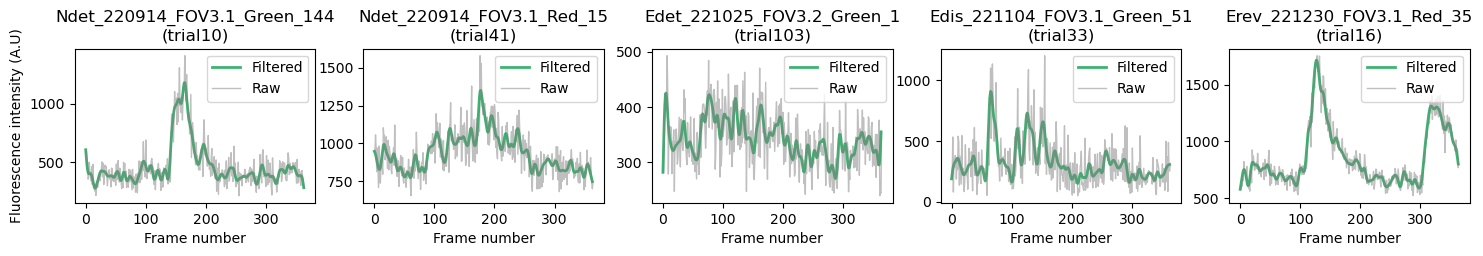

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=5,
                       figsize=(18,2))
rand_indexes = np.random.randint(0,filt_F.shape[0],5)
for col, (idx) in enumerate(rand_indexes):
    
    ## Plot filtered trace ##
    midx = filt_F.iloc[idx].name
    ax[col].plot(filt_F.iloc[idx], color='mediumseagreen', lw=2, label='Filtered')
    
    ## Plot raw trace ##
    raw = multiindex_all_data['all_F'][multiindex_all_data['all_F'].index == midx]
    ax[col].plot(raw.T, color='grey', lw=1, alpha=0.5, label='Raw')
    
    ## Axis labels ##
    roi = raw.index.get_level_values('Unique_ROI')[0]
    trial = raw.index.get_level_values('Trial')[0]
    ax[col].set_title(f'{roi}\n(trial{trial})')
    ax[col].set_xlabel('Frame number')
    ax[col].set_ylabel('Fluorescence intensity (A.U)') if col == 0 else None
    ax[col].legend()

## Calculate ∆F/F0 and detect calcium events ##
In order to measure “true” Ca2+ transients/events (i.e. those representing action potentials), the baseline level of fluorescence (F0) was first calculated for each ROI as follows:
1. For a given ROI, the median fluorescence value for a specified baseline period (e.g. from 2s-3s from trial onset) is calculated for each trial
2. All of these median values are then pooled together, and the baseline is then calculated as the median of these pooled medians
3. This process is repeated for each individual ROI within the FOV
- In order for a Ca2+ transient to be considered a Ca2+ event, it must surpass a ∆F/F0 (i.e. the ratio of transient fluorescence to baseline fluorescence) threshold of (STD of F0) multiplied by a threshold factor ***(i.e. thresh)*** for some number of consecutive samples ***(i.e. min_samples)*** above this threshold.

### Parameters to set ###
1. ***start (int or float):*** The starting time of the baseline period for ∆F/F0 calculation (in seconds)
2. ***end (int or float):*** The ending time of the baseline period for ∆F/F0 calculation (in seconds)
3. ***thresh (int):*** The number of standard deviations above baseline fluorescence intensity that is required to be a calcium event
4. ***min_samples (int)***: The number of consecutive samples above the thresh that is required to be a calcium event

In [24]:
start = 2
end = 3
thresh = 2
min_samples = 6

- Run ∆F/F0 calculation and event detection using the parameters set above

In [25]:
## Create empty containers to add calculated calcium metrics to ##
deltaF = []
dropped_ROIs = {}
events = []

## Group data session-by-session ##
groups = filt_F.groupby(filt_F.index.get_level_values('Unique session'))
for group in filt_F.index.get_level_values('Unique session').unique():
    dropped_ROIs[group] = {}
    group_df = groups.get_group(group)
    
    ## Load suite2p params file to retrieve recording settings (e.g. framerate) ##
    params = np.load(os.path.join(data_repository, mouse_ID, f'{mouse_ID}_suite2p_params.npy'),allow_pickle=True).item()
    protocol = group_df.index.get_level_values('Protocol').values[0]
    date = group_df.index.get_level_values('Date').values[0]
    FOV = group_df.index.get_level_values('FOV').values[0]
    fps = params[protocol][date][FOV]['FPS']

    ## Group data by recording channel ##
    channels = group_df.groupby(group_df.index.get_level_values('Channel'))
    for channel in group_df.index.get_level_values('Channel').unique():
        dropped_ROIs[group][channel] = []
        print(f'Processing {group} {channel} channel')
        channel_df = channels.get_group(channel)
        
        ## Group data ROI-by-ROI, which is the unit of analysis that we will calculate metrics on ##
        ROIs = channel_df.groupby(channel_df.index.get_level_values('ROI'))
        for ROI in channel_df.index.get_level_values('ROI').unique():
            ROI_df = ROIs.get_group(ROI)
            ROI_deltaF = calcium.calculate_deltaF(ROI_df, fps, start, end) #convert fluorescence intensity to deltaF/F
            ROI_events = calcium.get_ROI_event_metrics(ROI_deltaF, fps, dropped_ROIs, thresh, min_samples) #detect events and event metrics
            ev_freq = ROI_events.shape[0] / ROI_df.shape[0] #calculate event frequency (nEvents / nTrials)
            if ev_freq < 0.1: #drop ROIs that had less than 0.1 events per trial
                dropped_ROIs[group][channel].append(ROI)
            else:
                deltaF.append(ROI_deltaF)
                events.append(ROI_events)
        print()
        
## Combine deltaF/F and calcium event metrics from all protocols/sessions/FOVs/channels together ##
deltaF = pd.concat(deltaF)
events = pd.concat(events)

Processing Ndet_220914_FOV3.1 Green channel

Processing Ndet_220914_FOV3.1 Red channel

Processing Ndet_220919_FOV3.2 Green channel

Processing Ndet_220919_FOV3.2 Red channel

Processing Edet_221025_FOV3.1 Green channel

Processing Edet_221025_FOV3.1 Red channel

Processing Edet_221025_FOV3.2 Green channel

Processing Edet_221025_FOV3.2 Red channel

Processing Ndis_221026_FOV3.1 Green channel

Processing Ndis_221026_FOV3.1 Red channel

Processing Ndis_221026_FOV3.2 Green channel

Processing Ndis_221026_FOV3.2 Red channel

Processing Edis_221104_FOV3.1 Green channel

Processing Edis_221104_FOV3.1 Red channel

Processing Edis_221104_FOV3.2 Green channel

Processing Edis_221104_FOV3.2 Red channel

Processing Nrev_221105_FOV3.1 Green channel

Processing Nrev_221105_FOV3.1 Red channel

Processing Erev_221230_FOV3.1 Green channel

Processing Erev_221230_FOV3.1 Red channel

Processing Erev_221230_FOV3.2 Green channel

Processing Erev_221230_FOV3.2 Red channel



### Measure event-based pairwise correlations between ROIs ###
For each ROI – the “query ROI” – the Ca2+ events of this query ROI is compared against all other cross-channel ROIs in the same FOV (i.e. “comparison ROIs”). For each query-comparison pair, every Ca2+ event of the query ROI is compared against every Ca2+ event of the comparison ROI to detect “shared events” that occurred within a 500ms time window of each other (either 250ms before, or 250ms after). A shared event proportion is then calculated for each query-comparison pair as:
- ***Proportion(query ROI) = N(shared events between query and comparison ROI) / N(total events for query ROI)***

The final metric used to measure a given query ROIs functional connectivity was the maximum shared event proportion across its pairwise comparisons with all comparison ROIs (i.e. the proportion of events it had with its most correlated comparison ROI).


In [26]:
## Calculate pairwise correlations between ROIs ##
correlations = calcium.calculate_ROI_correlations(deltaF, 0)

## Define dictionary containing all of the components of the calcium processing steps ##
calcium_dict = {'filt_F': filt_F, 'deltaF':deltaF, 'dropped_ROIs':dropped_ROIs, 'events':events, 'correlations':correlations}

- First visualize detected calcium events

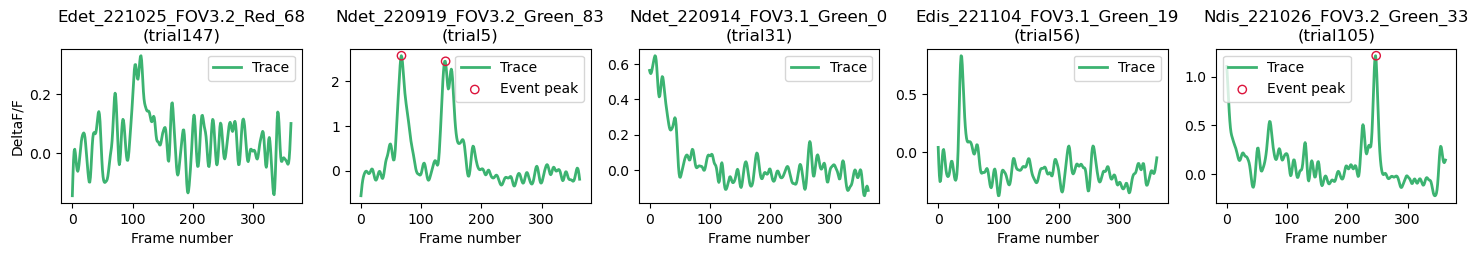

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=5,
                       figsize=(18,2))
rand_indexes = np.random.randint(0,calcium_dict['deltaF'].shape[0],5)
for col, (idx) in enumerate(rand_indexes):
    
    ## Plot deltaF ##
    df = calcium_dict['deltaF'].iloc[idx].to_frame().T
    df.index.names = filt_F.index.names
    ax[col].plot(df.T, color='mediumseagreen', lw=2, zorder=1)
    
    ## Find unique trial/ROI information ##
    roi = df.index.get_level_values('Unique_ROI')[0]
    unique_trial = df.index.get_level_values('Unique_trial')[0]
    trial = df.index.get_level_values('Trial')[0]
    
    ## Find detected events for this unique trial/ROI ##
    events = calcium_dict['events'][(calcium_dict['events'].Unique_ROI == roi) &
                           (calcium_dict['events'].Unique_trial == unique_trial)]
    for index, e in events.iterrows():
        peak_frame = 30.42 * e['peak_time']
        ax[col].scatter([peak_frame], e['peak'], edgecolor='crimson', facecolor='None', zorder=2)
    
    ## Axis labels ##
    ax[col].set_title(f'{roi}\n(trial{trial})')
    ax[col].set_xlabel('Frame number')
    ax[col].set_ylabel('DeltaF/F') if col == 0 else None
    ax[col].legend(['Trace','Event peak'])

- Next visualize highly correlated ROI pairs

In [28]:
all_pairwise_correlations = {}
for sesh, sesh_dict in calcium_dict['correlations']['cross-pairs'].items():
    session_dfs = {}
    for query_ROI, comparison_ROIs in sesh_dict.items():
        query_df = pd.DataFrame(comparison_ROIs.values(), index=comparison_ROIs.keys())
        session_dfs[query_ROI] = query_df
    session_df = pd.concat(session_dfs)
    all_pairwise_correlations[sesh] = session_df
pairwise_corr_df = pd.concat(all_pairwise_correlations)
pairwise_corr_df.index.names = ['Session','Query_ROI','Comparison_ROI']
to_plot_pos = pairwise_corr_df.sort_values(0, ascending=False).iloc[:2]

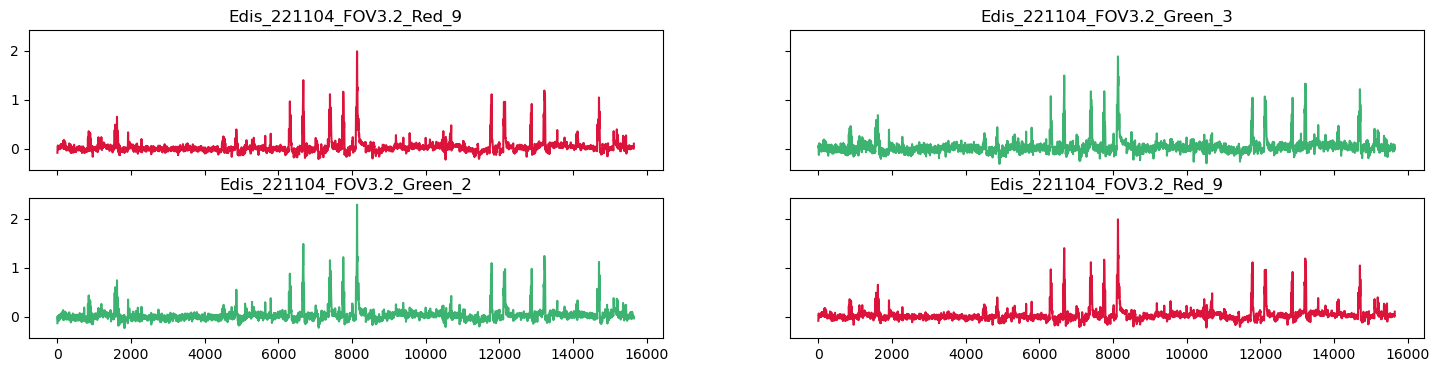

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(18,4),
                       sharex=True, sharey=True)
for col, (index, rows) in enumerate(to_plot_pos.iterrows()):
    query_color = 'crimson' if 'Red' in index[1] else 'mediumseagreen'
    comparison_color = 'mediumseagreen' if query_color == 'crimson' else 'crimson'
    
    query_deltaF = calcium_dict['deltaF'][calcium_dict['deltaF'].index.get_level_values('Unique_ROI') == index[1]].to_numpy().flatten()
    comparison_deltaF = calcium_dict['deltaF'][calcium_dict['deltaF'].index.get_level_values('Unique_ROI') == index[2]].to_numpy().flatten()
    
    ax[0,col].plot(query_deltaF, color=query_color)
    ax[0,col].set_title(index[1])
    ax[1,col].plot(comparison_deltaF, color=comparison_color)
    ax[1,col].set_title(index[2])

- Finally visualize highly anti-correlated ROI pairs

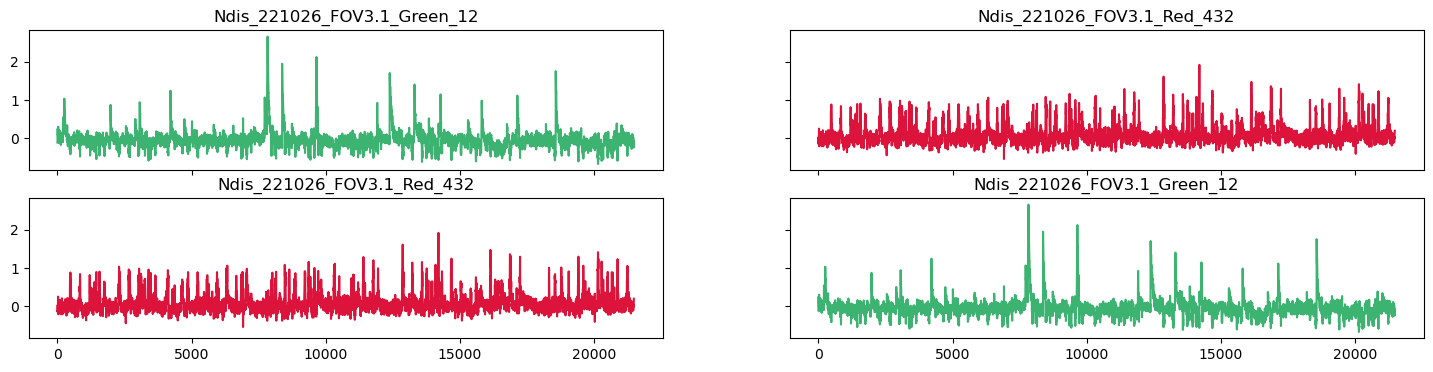

In [30]:
to_plot_ant = pairwise_corr_df.sort_values(0, ascending=True).iloc[:2]
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(18,4),
                       sharex=True, sharey=True)
for col, (index, rows) in enumerate(to_plot_ant.iterrows()):
    query_color = 'crimson' if 'Red' in index[1] else 'mediumseagreen'
    comparison_color = 'mediumseagreen' if query_color == 'crimson' else 'crimson'
    
    query_deltaF = calcium_dict['deltaF'][calcium_dict['deltaF'].index.get_level_values('Unique_ROI') == index[1]].to_numpy().flatten()
    comparison_deltaF = calcium_dict['deltaF'][calcium_dict['deltaF'].index.get_level_values('Unique_ROI') == index[2]].to_numpy().flatten()
    
    ax[0,col].plot(query_deltaF, color=query_color)
    ax[0,col].set_title(index[1])
    ax[1,col].plot(comparison_deltaF, color=comparison_color)
    ax[1,col].set_title(index[2])